In [15]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# iris 데이터셋 불러오기
iris = datasets.load_iris()

In [18]:
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

In [19]:
data = pd.DataFrame(data = iris.data, columns=feature_names)

In [21]:
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

In [11]:
# 밀도 기반의 알고리즘
from sklearn.cluster import DBSCAN

In [48]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
# eps 반지름
# min_sample 원 안의 데이터 갯수

In [49]:
dbscan_labels = dbscan.fit_predict(iris.data)

In [50]:
data['dbscan_cluster'] = dbscan_labels
data['target'] = iris.target
# 타겟 변수 추가

In [51]:
data

,Sepal length,Sepal width,Petal length,Petal width,labels,dbscan_cluster,target,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,1,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,1,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,1,2,1.900942,0.116628


In [52]:
iris_result = data.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result
# -1의 의미? 노이즈에 속하는 군집 의미, 0과 1 두개의 군집으로 군집화됨

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64

In [53]:
# 2차원 평면에서 표현하기 위해서 PCA를 이용해 2개의 feature로 압축 변환

In [54]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

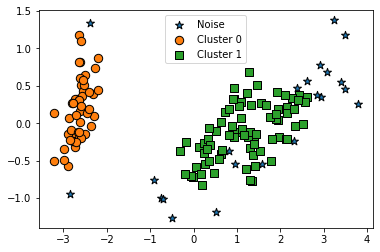

In [55]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
data['ftr1'] = pca_transformed[:,0]
data['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, data, 'dbscan_cluster', iscenter=False)